In [ ]:
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os
import torch
from google.colab import drive
import gc

In [ ]:
root_dir = '/content/'
project_dir = os.path.join(root_dir, 'Semantic-Segmentation')
data_dir = os.path.join(project_dir, 'data')
zip_path = '/content/drive/MyDrive/ColabNotebooks/datasets/camvid.zip'
branch = 'fixes'

In [ ]:
%cd $root_dir
if os.path.isdir(project_dir):
    %rm -rf $project_dir
torch.cuda.empty_cache()

/content


In [ ]:
# this should be done in order to avoid the uploading of code in google colab
# 1. Download code from gitlab
# 2. Change the working directory to the newly created folder
%cd $root_dir
if not os.path.isdir(project_dir):
    !git clone -b $branch --single-branch https://github.com/cristianmiholca/Semantic-Segmentation.git
drive.mount('/content/drive')
if not os.path.isdir(data_dir):
    %mkdir $data_dir
if not os.path.isdir(os.path.join(data_dir, 'CamVid')):
  !unzip -q $zip_path -d $data_dir
%cd $project_dir

/content
Cloning into 'Semantic-Segmentation'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 151 (delta 84), reused 104 (delta 40), pack-reused 0
Receiving objects: 100% (151/151), 25.45 KiB | 12.73 MiB/s, done.
Resolving deltas: 100% (84/84), done.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/Semantic-Segmentation


In [ ]:
!python ./main.py -h

usage: main.py [-h] [--device DEVICE] [--width WIDTH] [--height HEIGHT]
               [--epochs EPOCHS] [--batch-size BATCH_SIZE]
               [--learning-rate LEARNING_RATE] [--workers WORKERS]
               [--dataset {camvid}] [--dataset-dir DATASET_DIR]
               [--model {pspnet,unet,segnet}] [--tqdm {True,False}]
               [--name NAME] [--save-dir SAVE_DIR]

optional arguments:
  -h, --help            show this help message and exit
  --device DEVICE       Device on which the network will be trained. Default:
                        cuda
  --width WIDTH         The width of the image. Default: 512
  --height HEIGHT       The width of the image. Default: 512
  --epochs EPOCHS, -e EPOCHS
                        The number of epochs. Default: 100
  --batch-size BATCH_SIZE, -bs BATCH_SIZE
                        The batch size. Default: 8
  --learning-rate LEARNING_RATE, -lr LEARNING_RATE
                        The learning rate. Default: 5e-4
  --workers WORKERS     

1.8.1+cu101
['./data/CamVid/test/0001TP_006690.png', './data/CamVid/test/0001TP_006720.png', './data/CamVid/test/0001TP_006750.png', './data/CamVid/test/0001TP_006780.png', './data/CamVid/test/0001TP_006810.png', './data/CamVid/test/0001TP_006840.png', './data/CamVid/test/0001TP_006870.png', './data/CamVid/test/0001TP_006900.png', './data/CamVid/test/0001TP_006930.png', './data/CamVid/test/0001TP_006960.png', './data/CamVid/test/0001TP_006990.png', './data/CamVid/test/0001TP_007020.png', './data/CamVid/test/0001TP_007050.png', './data/CamVid/test/0001TP_007080.png', './data/CamVid/test/0001TP_007110.png', './data/CamVid/test/0001TP_007140.png', './data/CamVid/test/0001TP_007170.png', './data/CamVid/test/0001TP_007200.png', './data/CamVid/test/0001TP_007230.png', './data/CamVid/test/0001TP_007260.png', './data/CamVid/test/0001TP_007290.png', './data/CamVid/test/0001TP_007320.png', './data/CamVid/test/0001TP_007350.png', './data/CamVid/test/0001TP_007380.png', './data/CamVid/test/0001TP_

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.as_tensor(np.asarray(pic))
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be s


[Epoch: 0 | Training] Avg Loss:0.9233 | MIoU: 0.1264
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.38453509e-01 4.19393485e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.49839395e-02 3.65111648e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.03772868e-04 0.00000000e+00
 0.00000000e+00 8.17287869e-01 0.00000000e+00 5.70570267e-01
 3.60376034e-03 7.98571789e-01 1.31240883e-04 0.00000000e+00
 7.71103896e-04 0.00000000e+00 5.82277021e-01 0.00000000e+00
 0.00000000e+00 7.29075532e-05 1.06693061e-02 1.23302588e-01]


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.as_tensor(np.asarray(pic))
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be s


[Epoch: 1 | Training] Avg Loss:0.6318 | MIoU: 0.1815
[1.18498947e-01 0.00000000e+00            nan 0.00000000e+00
 7.49686552e-01 5.79091951e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.85010697e-01 1.05882552e-01 0.00000000e+00
 1.48713378e-03 0.00000000e+00 8.00180352e-02 8.51086309e-05
 2.76944609e-03 8.66622734e-01 0.00000000e+00 7.06821924e-01
 0.00000000e+00 8.72830694e-01 4.05856773e-03 0.00000000e+00
 5.10613737e-03            nan 6.75941511e-01 0.00000000e+00
 0.00000000e+00 7.96070627e-02 6.90008661e-02 2.41006993e-01]


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.as_tensor(np.asarray(pic))
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be s


[Epoch: 2 | Training] Avg Loss:0.5320 | MIoU: 0.2380
[0.38094398 0.                nan 0.         0.7767569  0.64002926
 0.         0.         0.00205543 0.42085751 0.27940626 0.
 0.0443543  0.         0.20555601 0.02958612 0.10574382 0.88890196
 0.05151329 0.76241266 0.         0.87676103 0.00814199 0.
 0.18183586        nan 0.70292608 0.         0.         0.2393684
 0.16059996 0.38361359]


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.as_tensor(np.asarray(pic))
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be s


[Epoch: 3 | Training] Avg Loss:0.4490 | MIoU: 0.2916
[0.49230076 0.                nan 0.         0.81685529 0.68252769
 0.         0.         0.02713642 0.51503949 0.34307247 0.
 0.15824921 0.         0.29997496 0.13779352 0.21895491 0.90102677
 0.23256291 0.79367495 0.03504353 0.88593942 0.11313444 0.
 0.31130622        nan 0.74041889 0.00096764 0.         0.36764259
 0.23986917 0.43533224]


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.as_tensor(np.asarray(pic))
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be s


[Epoch: 4 | Training] Avg Loss:0.3782 | MIoU: 0.3410
[0.54758308 0.                nan 0.         0.84522918 0.73420955
 0.         0.         0.09334847 0.60832563 0.39853761 0.
 0.29950363 0.         0.41792026 0.30782198 0.29286117 0.91470206
 0.36420821 0.81827211 0.07828141 0.89834491 0.09773628 0.
 0.43443138        nan 0.7694293  0.08920127 0.         0.43055961
 0.26446813 0.52555859]


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.as_tensor(np.asarray(pic))
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be s


[Epoch: 5 | Training] Avg Loss:0.3604 | MIoU: 0.3613
[0.60493211 0.                nan 0.         0.85523046 0.71556303
 0.         0.         0.12957066 0.61716376 0.43493318 0.
 0.37254138 0.         0.44709628 0.37289629 0.34268803 0.916545
 0.3632021  0.82607694 0.12125503 0.90085973 0.09390866 0.
 0.51136376        nan 0.77478853 0.1336079  0.         0.46682248
 0.28164941 0.55742594]


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.as_tensor(np.asarray(pic))
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be s


[Epoch: 6 | Training] Avg Loss:0.3144 | MIoU: 0.4019
[6.65626927e-01 0.00000000e+00            nan 0.00000000e+00
 8.73245974e-01 7.47909004e-01 0.00000000e+00 2.64454068e-04
 1.70359941e-01 6.72374265e-01 4.48613459e-01 0.00000000e+00
 4.45548174e-01 0.00000000e+00 5.08730530e-01 4.91081031e-01
 4.09697863e-01 9.25073191e-01 4.79384578e-01 8.50857307e-01
 2.21850947e-01 9.05532693e-01 1.55316315e-01 0.00000000e+00
 5.57467382e-01            nan 7.89381130e-01 2.97629525e-01
 0.00000000e+00 4.90808706e-01 3.28680016e-01 6.20479175e-01]


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.as_tensor(np.asarray(pic))
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be s


[Epoch: 7 | Training] Avg Loss:0.2830 | MIoU: 0.4374
[6.78413554e-01 2.86634034e-04            nan 0.00000000e+00
 8.87285988e-01 8.00624494e-01 0.00000000e+00 3.33202409e-02
 2.05849590e-01 7.22684675e-01 4.65951363e-01 0.00000000e+00
 4.88367302e-01 0.00000000e+00 5.57542033e-01 5.30158298e-01
 4.52160733e-01 9.28868778e-01 5.30253813e-01 8.57948356e-01
 2.83555053e-01 9.03939237e-01 3.46495293e-01 0.00000000e+00
 6.06718406e-01            nan 7.99523138e-01 3.94619333e-01
 0.00000000e+00 5.78710566e-01 3.85894422e-01 6.82375255e-01]


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.as_tensor(np.asarray(pic))
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be s


[Epoch: 8 | Training] Avg Loss:0.2602 | MIoU: 0.4711
[0.70434443 0.04071078        nan 0.         0.89290223 0.80708185
 0.         0.13511288 0.22899987 0.73529224 0.4768302  0.
 0.53057028 0.         0.57594254 0.62683211 0.48628054 0.93351765
 0.69140193 0.87409388 0.36969932 0.91007159 0.46416222 0.
 0.62113438        nan 0.81524896 0.52142811 0.         0.58586285
 0.40433588 0.70000205]


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.as_tensor(np.asarray(pic))
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be s


[Epoch: 9 | Training] Avg Loss:0.2725 | MIoU: 0.4675
[7.21022927e-01 8.22281750e-02            nan 0.00000000e+00
 8.87483780e-01 8.23932257e-01 2.32792737e-04 1.98098696e-01
 2.35339115e-01 7.13808365e-01 4.62875252e-01 0.00000000e+00
 5.53056053e-01 0.00000000e+00 5.75541545e-01 5.68488159e-01
 4.87974009e-01 9.27717822e-01 6.55596197e-01 8.58157681e-01
 3.88194833e-01 9.06200027e-01 5.75290006e-01 0.00000000e+00
 6.19237579e-01            nan 7.96890984e-01 4.64614338e-01
 0.00000000e+00 5.19082759e-01 3.60715022e-01 6.43242095e-01]


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.as_tensor(np.asarray(pic))
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be s


[Epoch: 9 | Validation] Avg loss: 0.3945 | MIoU: nan


Testing



/content/Semantic-Segmentation/metrics/iou.py:46: RuntimeWarning: Mean of empty slice
  return iou, np.nanmean(iou)


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.as_tensor(np.asarray(pic))
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be s


[Test] loss: 0.4839 | MIoU: nan


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  img = torch.as_tensor(np.asarray(pic))
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:169: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be s

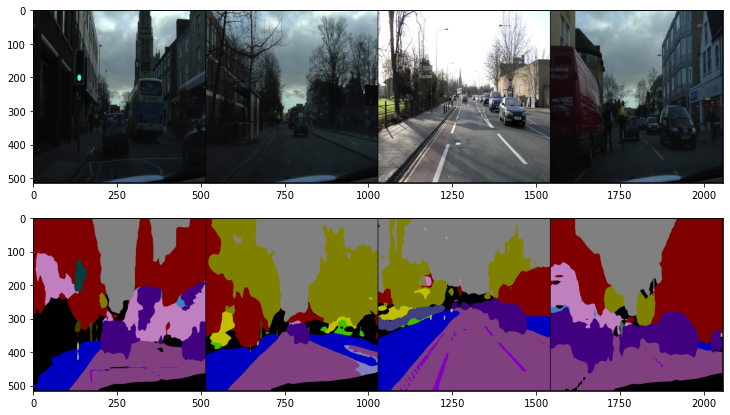

4886

In [ ]:
# !python3 ./main.py --dataset-dir ./data/CamVid/ --epochs 15  --batch-size 8
%run './main.py' --model pspnet --dataset-dir ./data/CamVid/ --epochs 10 --learning-rate 0.001 --batch-size 4
gc.collect() 